In [20]:
#Variables
import random,math
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

lifetime = 15 #The lifetime of the snake is 15 years
highest = 2000 #Let's assume the highest limit is 200
tempNow = 24
Initial_sex_ratio = 1/1
sexual_maturity = 12 #sexual maturity at age 3 so can breed 11/15 years


copulation_factor = lambda sex_ratio: np.random.normal(0.05,0.01) if sex_ratio>1 else np.random.normal(-0.1,-0.01) #some factors

#Logistic Function because most population growth follow this..This is already solved one..
growth = lambda initial,rate : initial + (rate *(1-(initial/highest))*initial)


def simulate_dynamics(initial,simulations,temp_list):
     
    pop_list,rates = [initial],[]
    count = 1
    def population(sex_ratio,count):
            #sex_ratio = 0.068*temp_list[count]-0.95
            eggs = np.round(np.random.normal(13, 5, 1)) #because some egss don't hatch..happens randomly
            birth_rate = ((1/(sex_ratio+1))*sexual_maturity*eggs)/pop_list[count-1]
            mortality_rate = 1/15  #since pine snake lives for 15 years
            rate = birth_rate - mortality_rate
            pop = np.round(growth(initial,rate))
            return pop
    
    for sim in range(len(simulations)-1):
        sex_ratio = Initial_sex_ratio + (0.068*(tempNow + temp_list[count-1]-0.95))
        avg_pop = np.round(np.mean([population(sex_ratio,count) for i in range(1000)]))
        cop_factor = np.mean([copulation_factor(sex_ratio) for i in range(1000)])
        pop_list.append(avg_pop- np.round(cop_factor*pop_list[count-1]))
        #print("pop",sex_ratio,pop_list[count],eggs,cop_factor,count)
        count+=1
    return pop_list
temp_list = [2.3,-0.4,4.7,3.1,2.7,-0.3,3.6,2.8,2.6,2.3,8.4,9.7,-7.1,-1.7,2.3,3.6,4.8,1.6]
temp_real = list(map(lambda x:x+tempNow,temp_list))
simulation_list = [i for i in range(len(temp_list))]
def call(pop_list_at_beginning):
    f, ax = plt.subplots(2,2,figsize=(12,12))
    pop_list = []
    for pop in pop_list_at_beginning:
#         plt.figure()
        popu = simulate_dynamics(pop,simulation_list,temp_real)
        pop_list.append(popu)
    
    ax[0,0].plot(simulation_list,pop_list[0])
    #ax[0,0].plot(simulation_list,temp_real)
    ax[0,0].set_title("Intial pop<30")
    ax[0,1].plot(simulation_list,pop_list[1])
    #ax[0,1].plot(simulation_list,temp_real)
    ax[0,1].set_title("Initial pop=30")
    ax[1,0].plot(simulation_list,pop_list[2])
    #ax[1,0].plot(simulation_list,temp_real)
    ax[1,0].set_title("Initital pop >30 and <90")
    ax[1,1].plot(simulation_list,pop_list[3])
    #ax[1,1].plot(simulation_list,temp_real)
    ax[1,1].set_title("Initial pop =100")
    for x in ax.flat:
        x.set(xlabel='Years', ylabel='Population')
    
    plt.savefig("Behavior in different max population population in temperature evolutionary.png")



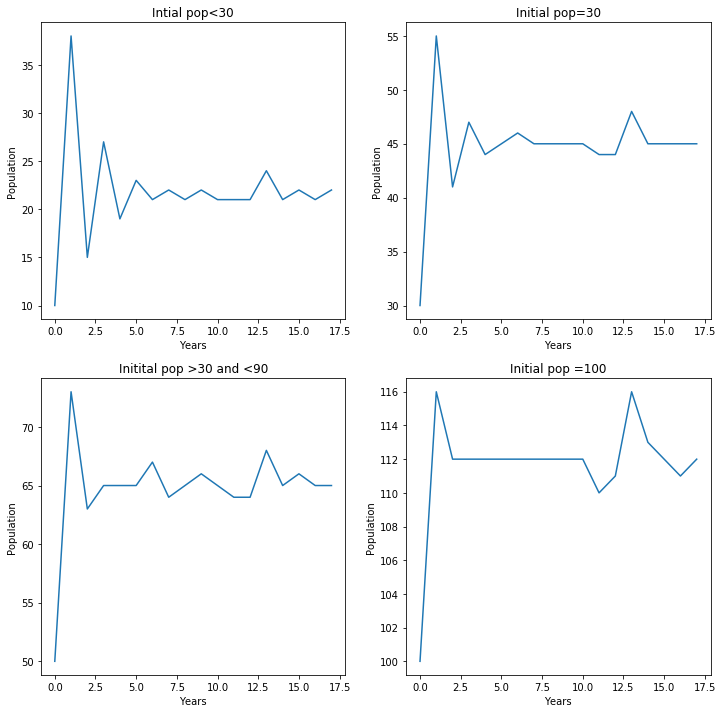

In [21]:
pop_list_at_Initial = [10,30,50,100]
call(pop_list_at_Initial)

-0.07746406008517864